In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taseermehboob9/marketing-campaigns-logistic-regression")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'marketing-campaigns-logistic-regression' dataset.
Path to dataset files: /kaggle/input/marketing-campaigns-logistic-regression


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
df = pd.read_csv(os.path.join(path, "Marketingcampaigns.csv"))
df.head()

# print(os.listdir(path))

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


In [5]:
df.describe()

,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,38.250000,0.550000,0.500000,0.600000,2.10000,0.500000,0.500000
std,5.91608,15.382406,0.510418,0.512989,0.502625,1.68273,0.512989,0.512989
min,1.00000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.75000,24.500000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,10.50000,38.000000,1.000000,0.500000,1.000000,2.00000,0.500000,0.500000
75%,15.25000,53.500000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000
max,20.00000,62.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000


In [6]:
df.shape

(20, 9)

In [7]:
coln = df.columns
print(coln)

Index(['Customer id', 'Age', 'Gender', 'Location', 'Email Opened',
       'Email Clicked', 'Product page visit', 'Discount offered', 'Purchased'],
      dtype='object')


In [8]:
df = df.drop(['Customer id','Location'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 20 non-null     int64
 1   Gender              20 non-null     int64
 2   Email Opened        20 non-null     int64
 3   Email Clicked       20 non-null     int64
 4   Product page visit  20 non-null     int64
 5   Discount offered    20 non-null     int64
 6   Purchased           20 non-null     int64
dtypes: int64(7)
memory usage: 1.2 KB


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Email Opened,0
Email Clicked,0
Product page visit,0
Discount offered,0
Purchased,0


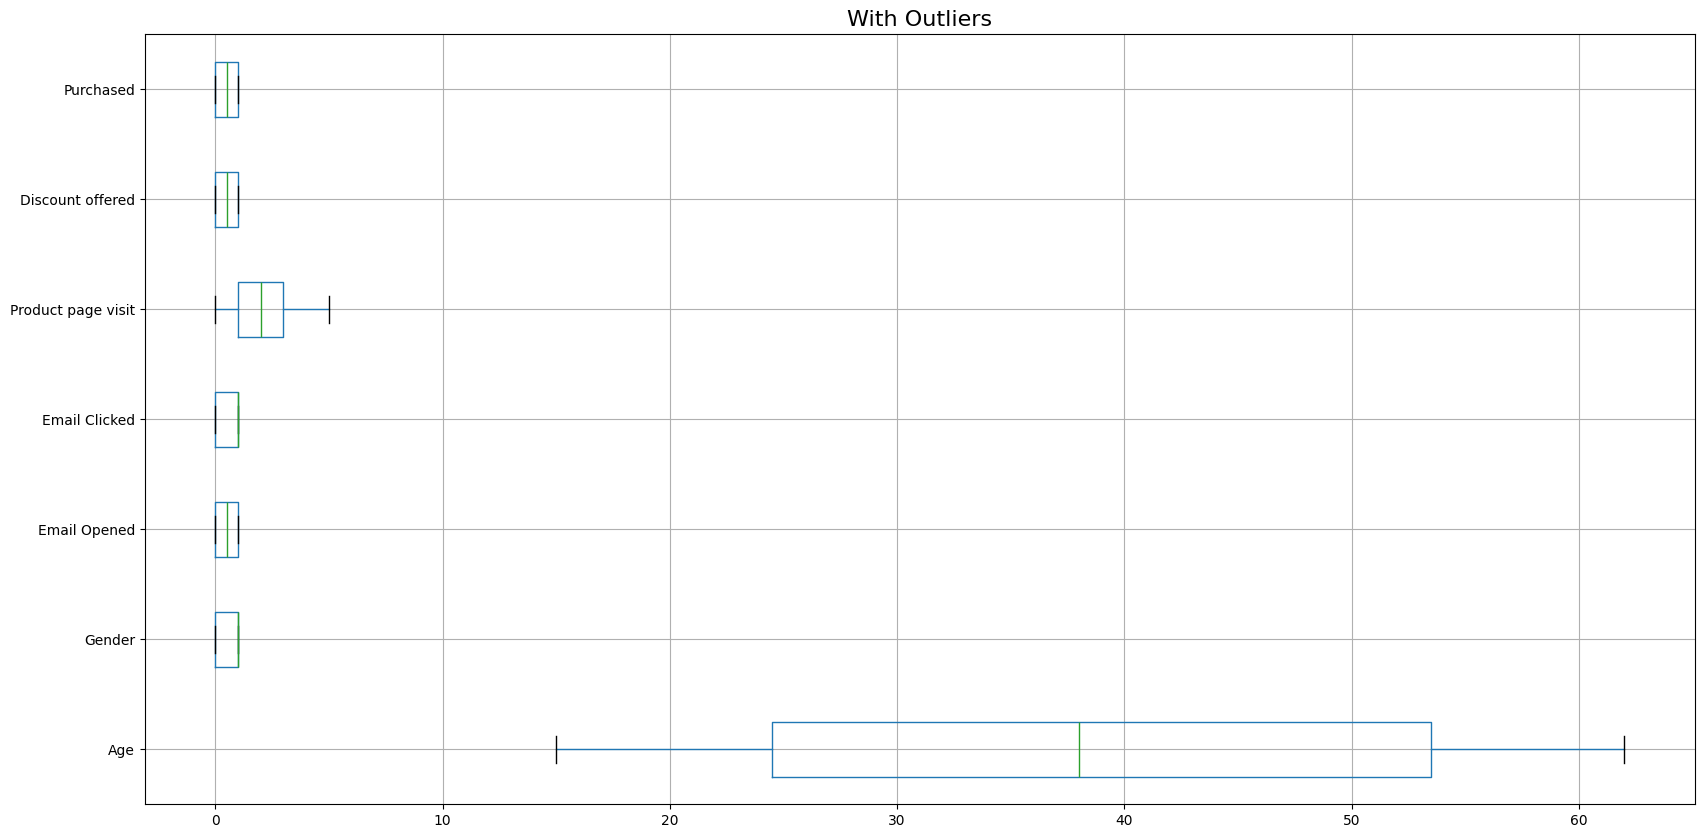

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20,10))
df[numeric_cols].boxplot(vert=False)   # or vert=0 works too
plt.title('With Outliers', fontsize=16)
plt.show()

In [11]:
X = df.drop('Product page visit', axis=1)
y = df['Product page visit']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16, 6), (4, 6))

In [13]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical
X_train[numerical].isnull().sum()

,0
Age,0
Gender,0
Email Opened,0
Email Clicked,0
Discount offered,0
Purchased,0


In [14]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([5, 1, 1, 1])

In [16]:
logreg.predict_proba(X_test)[:,0]

array([0.03391644, 0.13749006, 0.24270398, 0.26949305])

In [17]:
logreg.predict_proba(X_test)[:,0]

array([0.03391644, 0.13749006, 0.24270398, 0.26949305])

In [18]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 5, 5, 2, 2, 3, 2, 2, 5, 2, 2, 2, 5, 2, 2])

In [19]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6875


In [20]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6875
Test set score: 0.2500


In [21]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [22]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.2500


In [23]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [24]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.3125
Test set score: 0.0000


In [25]:
y_test.value_counts()

,count
Product page visit,
0,2
3,1
1,1


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 2 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]]

True Positives(TP) =  0

True Negatives(TN) =  1

False Positives(FP) =  2

False Negatives(FN) =  0


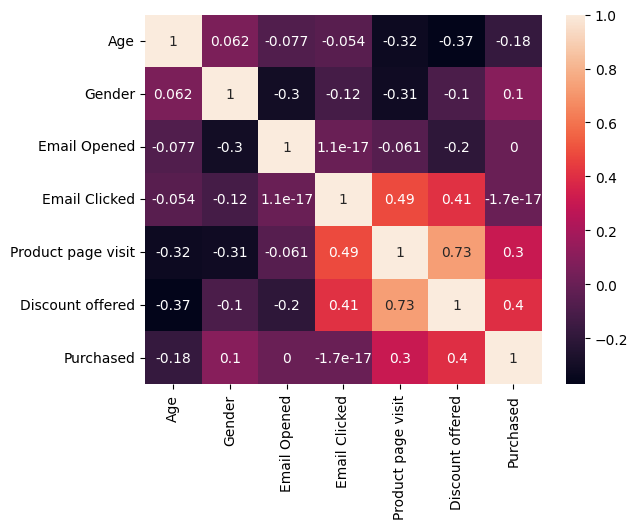

In [27]:
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.08      0.25      0.12         4
weighted avg       0.08      0.25      0.12         4



In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.3333


In [31]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.6667


In [32]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


In [33]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


In [34]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : nan


In [35]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.6667


In [36]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.3333


In [37]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.03391644, 0.15223795, 0.15304103, 0.14571702, 0.20751747,
        0.3075701 ],
       [0.13749006, 0.20075749, 0.17185953, 0.18094505, 0.17256467,
        0.13638321],
       [0.24270398, 0.43328103, 0.24949517, 0.01775065, 0.01429246,
        0.04247671],
       [0.26949305, 0.43218709, 0.11564085, 0.01547638, 0.03487803,
        0.13232461]])

In [38]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.15223795, 0.20075749, 0.43328103, 0.43218709])

In [39]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]